# German Credit Card

**Objective:**

 The objective of this dataset is likely to build a predictive model for credit risk assessment, aiming to determine the likelihood of credit applicants defaulting on their credit obligations based on their financial and personal attributes.

**Overview of the dataset**

Number of observation - 1000

number of variables   - 17

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [2]:
dataset=pd.read_csv("G:\LearnBay Machine Learning\Tree_Based_Model(3)\Dataset\German Credit Dataset.csv")
dataset.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [3]:
# "default" is dependent variable

# Information about the Dataset

In [4]:
dataset.shape

(1000, 17)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

# DATA PREPROCESSING

**Handling missing value**

In [6]:
dataset.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [7]:
dataset.isnull().sum()/len(dataset)*100

checking_balance        0.0
months_loan_duration    0.0
credit_history          0.0
purpose                 0.0
amount                  0.0
savings_balance         0.0
employment_duration     0.0
percent_of_income       0.0
years_at_residence      0.0
age                     0.0
other_credit            0.0
housing                 0.0
existing_loans_count    0.0
job                     0.0
dependents              0.0
phone                   0.0
default                 0.0
dtype: float64

In [8]:
# no any missing value is there.

**Checking unique value**

In [9]:
for i in dataset.columns:
    print("*****************************************",i,
          "***************************************************************")
    print()
    print(set(dataset[i].tolist()))
    
    print()

***************************************** checking_balance ***************************************************************

{'1 - 200 DM', '> 200 DM', '< 0 DM', 'unknown'}

***************************************** months_loan_duration ***************************************************************

{4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 24, 26, 27, 28, 30, 33, 36, 39, 40, 42, 45, 47, 48, 54, 60, 72}

***************************************** credit_history ***************************************************************

{'perfect', 'critical', 'poor', 'good', 'very good'}

***************************************** purpose ***************************************************************

{'business', 'renovations', 'car0', 'furniture/appliances', 'education', 'car'}

***************************************** amount ***************************************************************

{2051, 6148, 2058, 4110, 2063, 2064, 4113, 2069, 2073, 2080, 8229, 6187, 4139, 2096, 

In [10]:
dataset

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


# Exploratory Data Analysis(EDA)

In the exploratory data analysis, I will be looking at the data and try to understand the data.I will begin by looking at the distribution of data across the dataset,followed by visualizing the data to understand the relationship between the features and the target variable.

**credit_history**

In [11]:
dataset['credit_history'].value_counts()

good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64

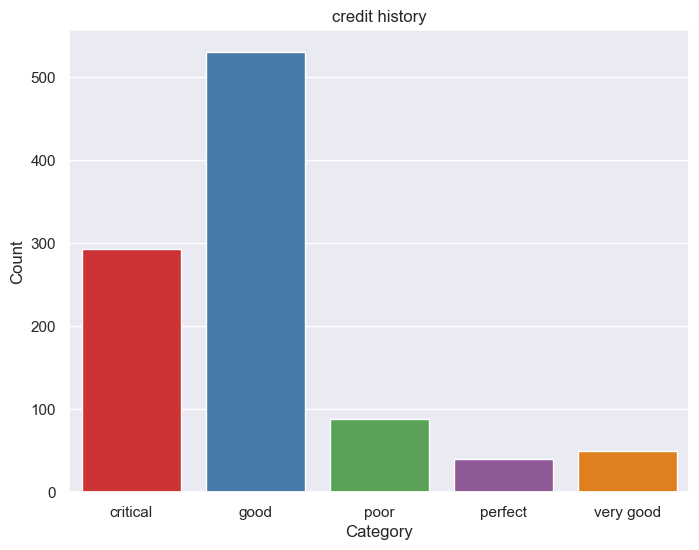

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='credit_history', data=dataset, palette='Set1')
plt.title('credit history')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

**amount**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


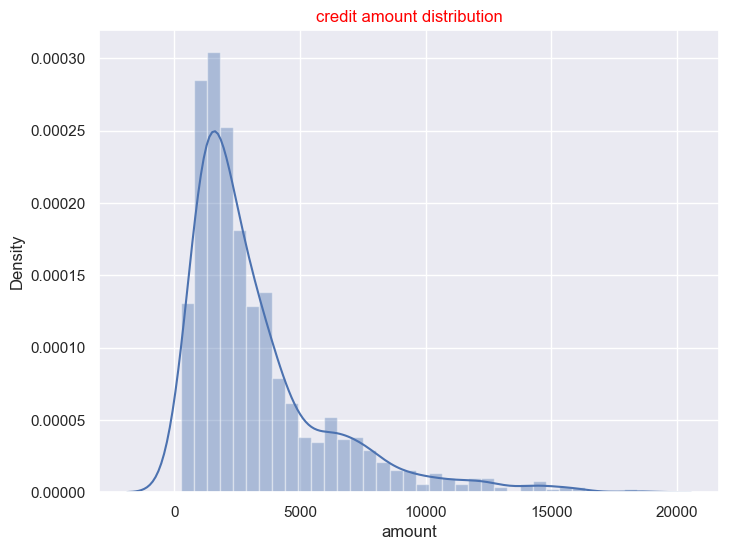

In [13]:
plt.figure(figsize=(8, 6))
sns.distplot(dataset.amount)
plt.title('credit amount distribution',color='red')
# plt.xlabel('Category')
#plt.ylabel('Count')
plt.show()

**employment_duration**

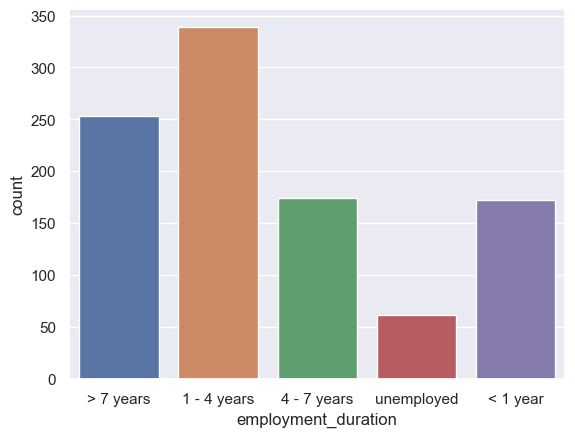

In [14]:
sns.countplot(x='employment_duration',data=dataset)
plt.show()

**age**

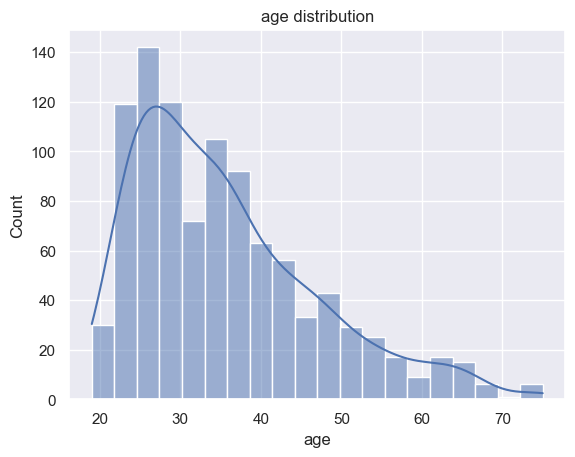

In [15]:
sns.histplot(x='age',data=dataset,bins=20,kde=True)
plt.title("age distribution")
plt.show()

**housing**

In [16]:
dataset['housing'].value_counts()

own      713
rent     179
other    108
Name: housing, dtype: int64

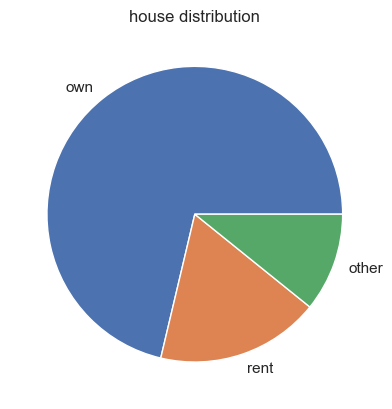

In [17]:
plt.pie(dataset['housing'].value_counts(),labels=['own','rent','other'])
plt.title('house distribution')
plt.show()

**job**

In [18]:
dataset['job'].value_counts()

skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64

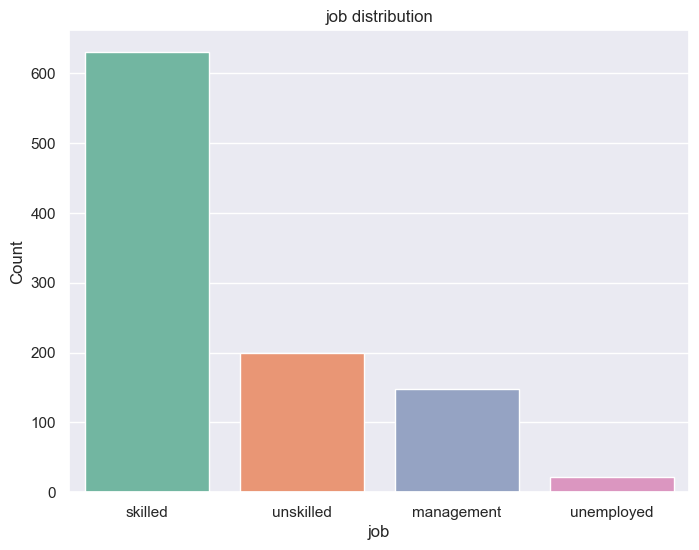

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='job', data=dataset, palette='Set2')
plt.title('job distribution')
plt.xlabel('job')
plt.ylabel('Count')
plt.show()

**default and age**

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

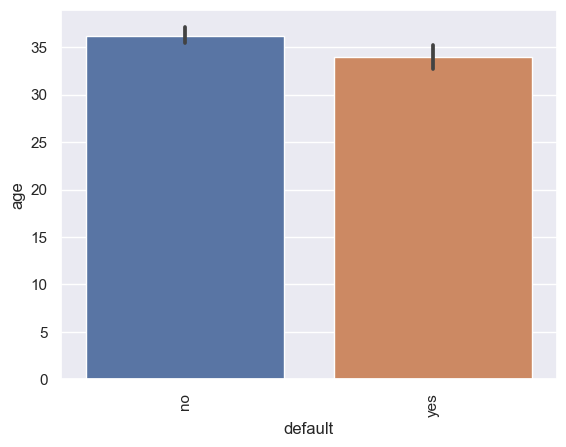

In [20]:
# default vs age
sns.barplot(x='default',y='age',data=dataset)
plt.xticks(rotation=90)

**default and amount**

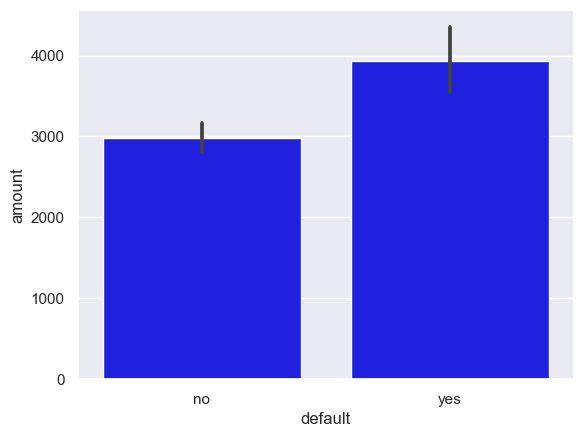

In [21]:
sns.barplot(x='default',y='amount',data=dataset,color='blue')
plt.show()

In [22]:
data_num=dataset.select_dtypes(exclude='object')
data_num=list(data_num.columns)
data_num


['months_loan_duration',
 'amount',
 'percent_of_income',
 'years_at_residence',
 'age',
 'existing_loans_count',
 'dependents']

# Outlier Treatment

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


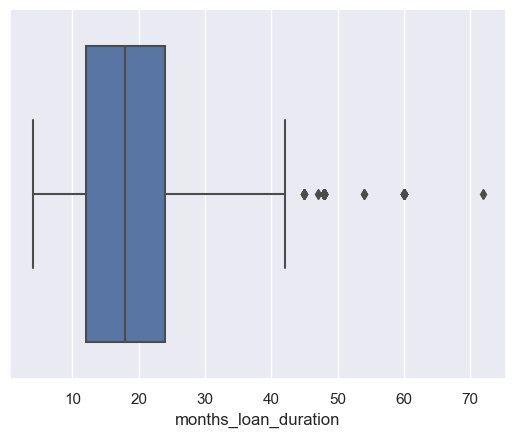

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


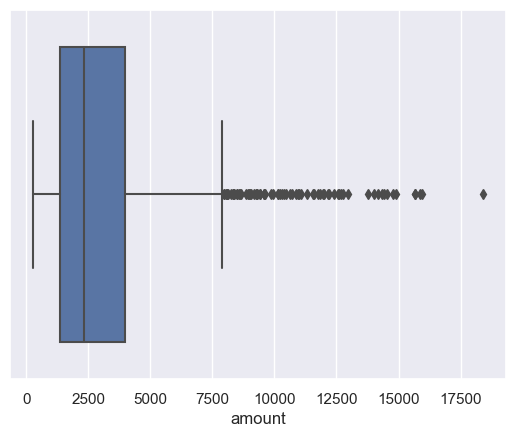

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


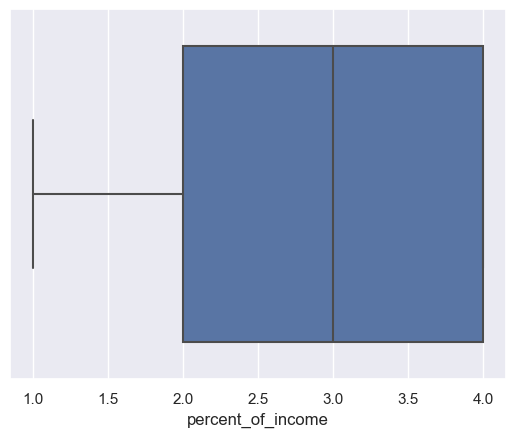

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


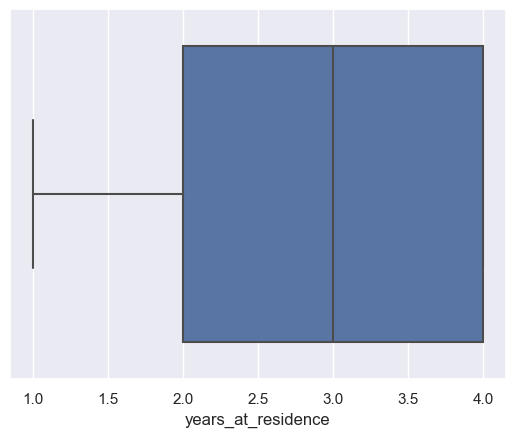

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


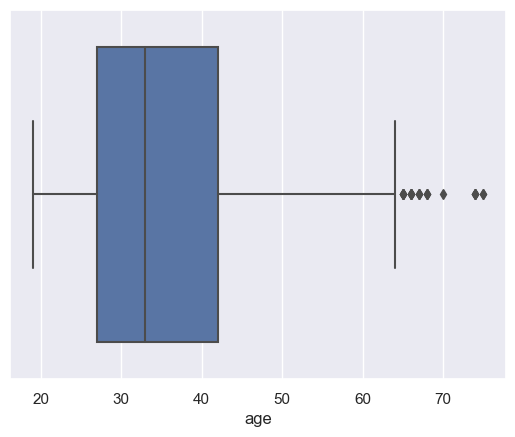

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


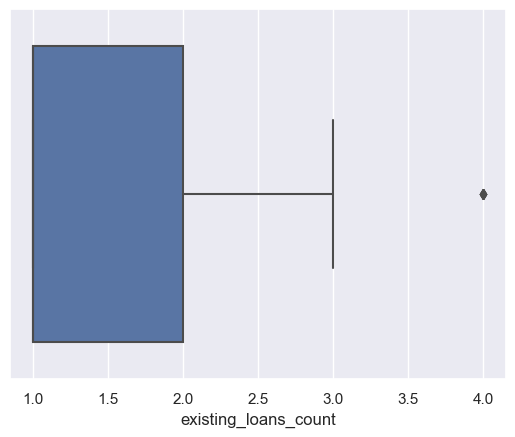

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


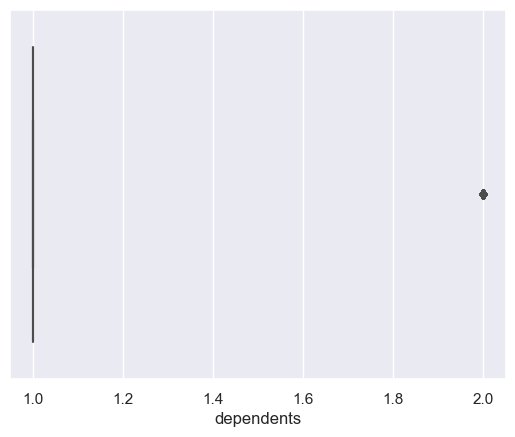

In [23]:
# check Outlier
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()

for col in dataset.select_dtypes(exclude='object').columns[0:]:
    boxplots(col)



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


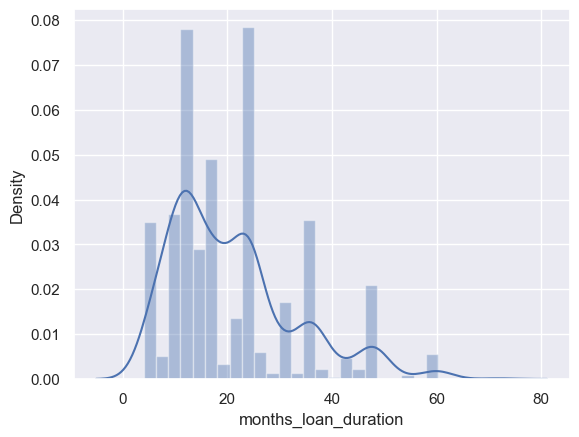

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


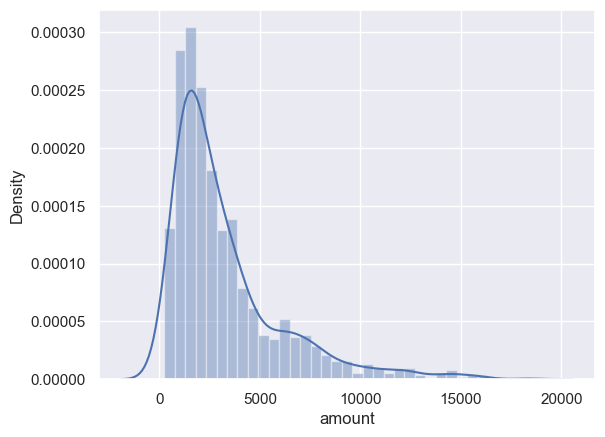

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


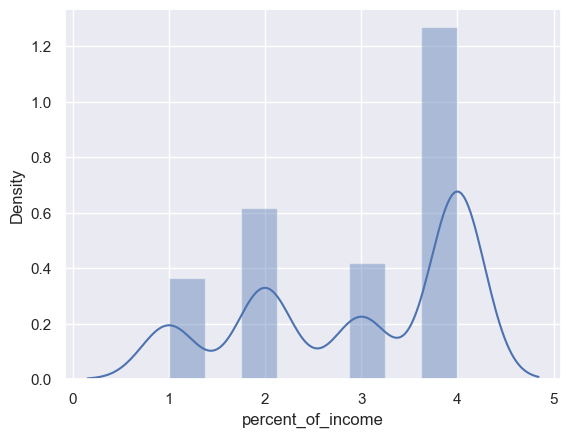

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


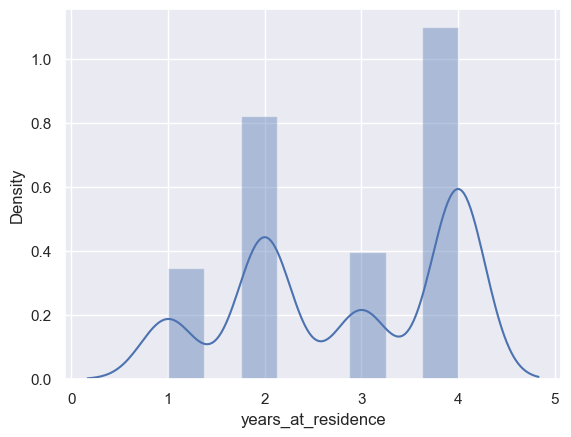

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


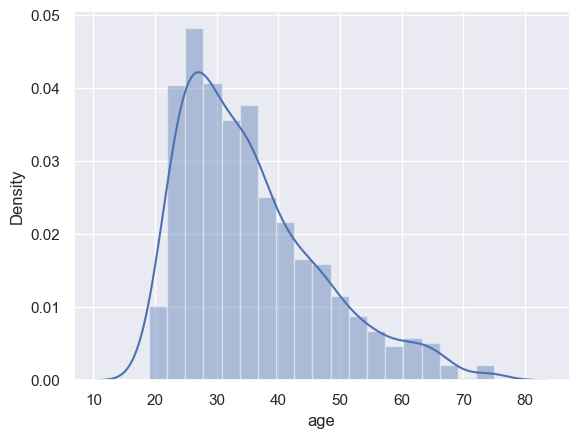

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


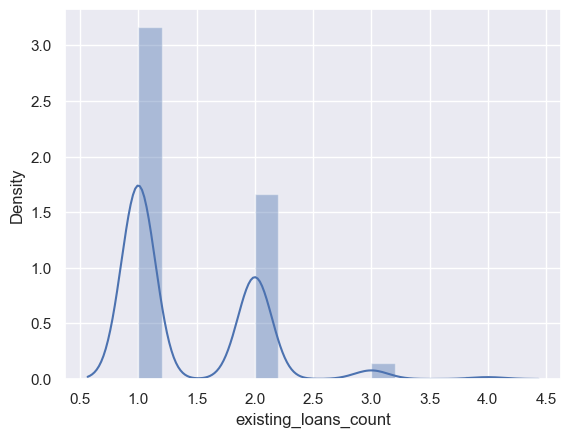

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


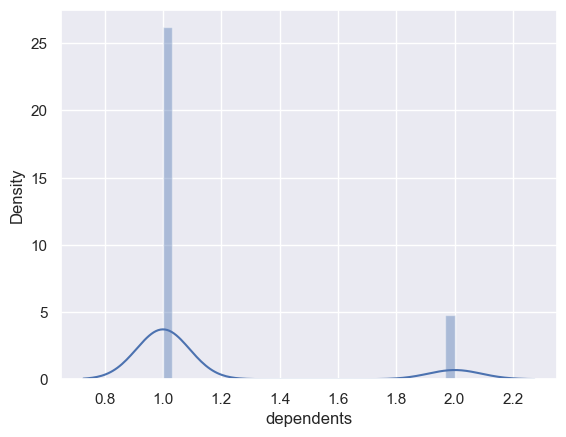

In [24]:
def distplots(col):
  sns.distplot(dataset[col])
  plt.show()

    
for col in dataset.select_dtypes(exclude='object').columns[0:]:
    distplots(col)
# for i in list(dataset.columns)[0:]:
#   distplots(i)

In [25]:
# ['months_loan_duration',
#  'amount',
#  'percent_of_income',
#  'years_at_residence',
#  'age',
#  'existing_loans_count',
#  'dependents']

In [26]:
# Outlier Detect - "months_loan_duration","amount","age","existing_loans_count","dependents"

In [27]:
months_loan_duration_Q1=dataset['months_loan_duration'].quantile(0.25)
months_loan_duration_Q3=dataset['months_loan_duration'].quantile(0.75)
months_loan_duration_iqr=months_loan_duration_Q3 - months_loan_duration_Q1

upper_months_loan_duration=months_loan_duration_Q3 + 1.5*months_loan_duration_iqr
lower_months_loan_duration=months_loan_duration_Q1 - 1.5*months_loan_duration_iqr

dataset['months_loan_duration']=np.where(dataset['months_loan_duration'] > upper_months_loan_duration,upper_months_loan_duration,
                            np.where(dataset['months_loan_duration'] < lower_months_loan_duration,lower_months_loan_duration,
                            dataset['months_loan_duration']))

In [28]:
amount_Q1=dataset['amount'].quantile(0.25)
amount_Q3=dataset['amount'].quantile(0.75)
amount_iqr=amount_Q3 - amount_Q1

upper_amount=amount_Q3 + 1.5*amount_iqr
lower_amount=amount_Q1 - 1.5*amount_iqr

dataset['amount']=np.where(dataset['amount'] > upper_amount,upper_amount,
                            np.where(dataset['amount'] < lower_amount,lower_amount,
                            dataset['amount']))

In [29]:
age_Q1=dataset['age'].quantile(0.25)
age_Q3=dataset['age'].quantile(0.75)
age_iqr=age_Q3 - age_Q1

upper_age=age_Q3 + 1.5*age_iqr
lower_age=age_Q1 - 1.5*age_iqr

dataset['age']=np.where(dataset['age'] > upper_age,upper_age,
                            np.where(dataset['age'] < lower_age,lower_age,
                            dataset['age']))

In [30]:
existing_loans_count_Q1=dataset['existing_loans_count'].quantile(0.25)
existing_loans_count_Q3=dataset['existing_loans_count'].quantile(0.75)
existing_loans_count_iqr=existing_loans_count_Q3 - existing_loans_count_Q1

upper_existing_loans_count=existing_loans_count_Q3 + 1.5*existing_loans_count_iqr
lower_existing_loans_count=existing_loans_count_Q1 - 1.5*existing_loans_count_iqr

dataset['existing_loans_count']=np.where(dataset['existing_loans_count'] > upper_existing_loans_count,upper_existing_loans_count,
                            np.where(dataset['existing_loans_count'] < lower_existing_loans_count,lower_existing_loans_count,
                            dataset['existing_loans_count']))

In [31]:
dependents_Q1=dataset['dependents'].quantile(0.25)
dependents_Q3=dataset['dependents'].quantile(0.75)
dependents_iqr=dependents_Q3 - dependents_Q1

upper_dependents=dependents_Q3 + 1.5*dependents_iqr
lower_dependents=dependents_Q1 - 1.5*dependents_iqr

dataset['dependents']=np.where(dataset['dependents'] > upper_dependents,upper_dependents,
                            np.where(dataset['dependents'] < lower_dependents,lower_dependents,
                            dataset['dependents']))

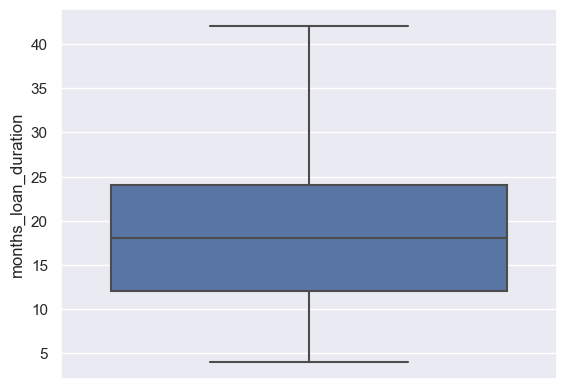

In [32]:
# Check Outlier :-
sns.boxplot(y='months_loan_duration',data=dataset)
plt.show()

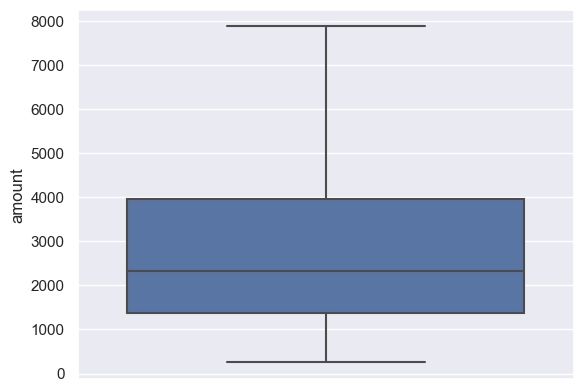

In [33]:
sns.boxplot(y='amount',data=dataset)
plt.show()

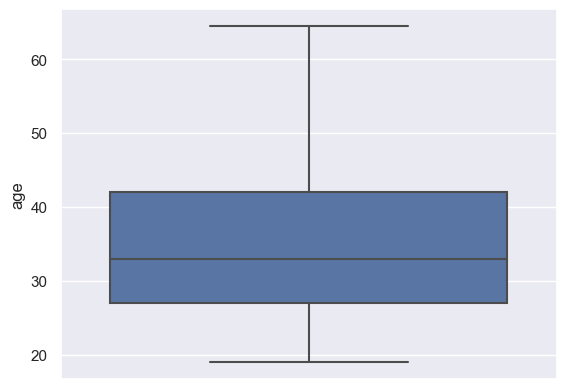

In [34]:
sns.boxplot(y="age",data=dataset)
plt.show()

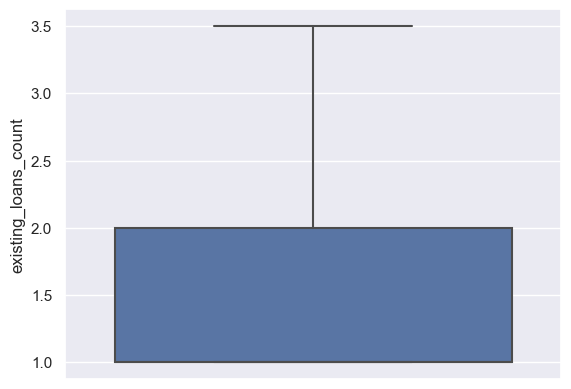

In [35]:
sns.boxplot(y="existing_loans_count",data=dataset)
plt.show()

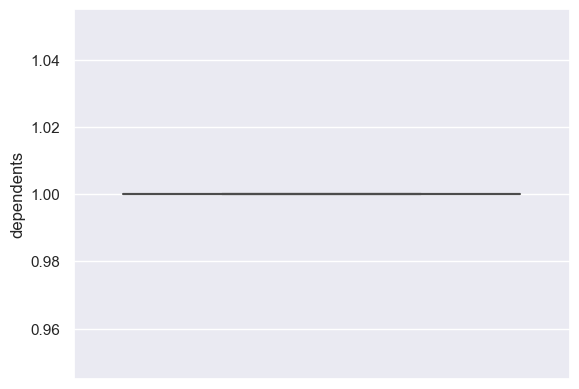

In [36]:
sns.boxplot(y="dependents",data=dataset)
plt.show()

In [37]:
dataset

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6.0,critical,furniture/appliances,1169.0,unknown,> 7 years,4,4,64.5,none,own,2.0,skilled,1.0,yes,no
1,1 - 200 DM,42.0,good,furniture/appliances,5951.0,< 100 DM,1 - 4 years,2,2,22.0,none,own,1.0,skilled,1.0,no,yes
2,unknown,12.0,critical,education,2096.0,< 100 DM,4 - 7 years,2,3,49.0,none,own,1.0,unskilled,1.0,no,no
3,< 0 DM,42.0,good,furniture/appliances,7882.0,< 100 DM,4 - 7 years,2,4,45.0,none,other,1.0,skilled,1.0,no,no
4,< 0 DM,24.0,poor,car,4870.0,< 100 DM,1 - 4 years,3,4,53.0,none,other,2.0,skilled,1.0,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12.0,good,furniture/appliances,1736.0,< 100 DM,4 - 7 years,3,4,31.0,none,own,1.0,unskilled,1.0,no,no
996,< 0 DM,30.0,good,car,3857.0,< 100 DM,1 - 4 years,4,4,40.0,none,own,1.0,management,1.0,yes,no
997,unknown,12.0,good,furniture/appliances,804.0,< 100 DM,> 7 years,4,4,38.0,none,own,1.0,skilled,1.0,no,no
998,< 0 DM,42.0,good,furniture/appliances,1845.0,< 100 DM,1 - 4 years,4,4,23.0,none,other,1.0,skilled,1.0,yes,yes


# Encoding

**Label Encoder**

In [38]:
# Label encoding
cat_column=[]
for col in dataset.columns:
    if dataset[col].nunique()<=6:
        cat_column.append(col)
print(cat_column)

['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'percent_of_income', 'years_at_residence', 'other_credit', 'housing', 'existing_loans_count', 'job', 'dependents', 'phone', 'default']


In [39]:
# label encoder
for col in cat_column:
    if dataset[col].nunique()<=2:
        dataset[col]=dataset[col].astype('category')
        dataset[col]=dataset[col].cat.codes

**One Hot Encoder**

In [40]:
# one hot encoder
for col in cat_column:
    if dataset[col].nunique()>2:
        dataset=pd.get_dummies(dataset,columns=[col],drop_first=True)

In [41]:
dataset.head(10)

,months_loan_duration,amount,age,dependents,phone,default,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_good,...,other_credit_none,other_credit_store,housing_own,housing_rent,existing_loans_count_2.0,existing_loans_count_3.0,existing_loans_count_3.5,job_skilled,job_unemployed,job_unskilled
0,6.0,1169.000,64.5,0,1,0,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0
1,42.0,5951.000,22.0,0,0,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
2,12.0,2096.000,49.0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
3,42.0,7882.000,45.0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,24.0,4870.000,53.0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
5,36.0,7882.375,35.0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
6,24.0,2835.000,53.0,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,1,0,0
7,36.0,6948.000,35.0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
8,12.0,3059.000,61.0,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,1
9,30.0,5234.000,28.0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0


# Finding Correlation

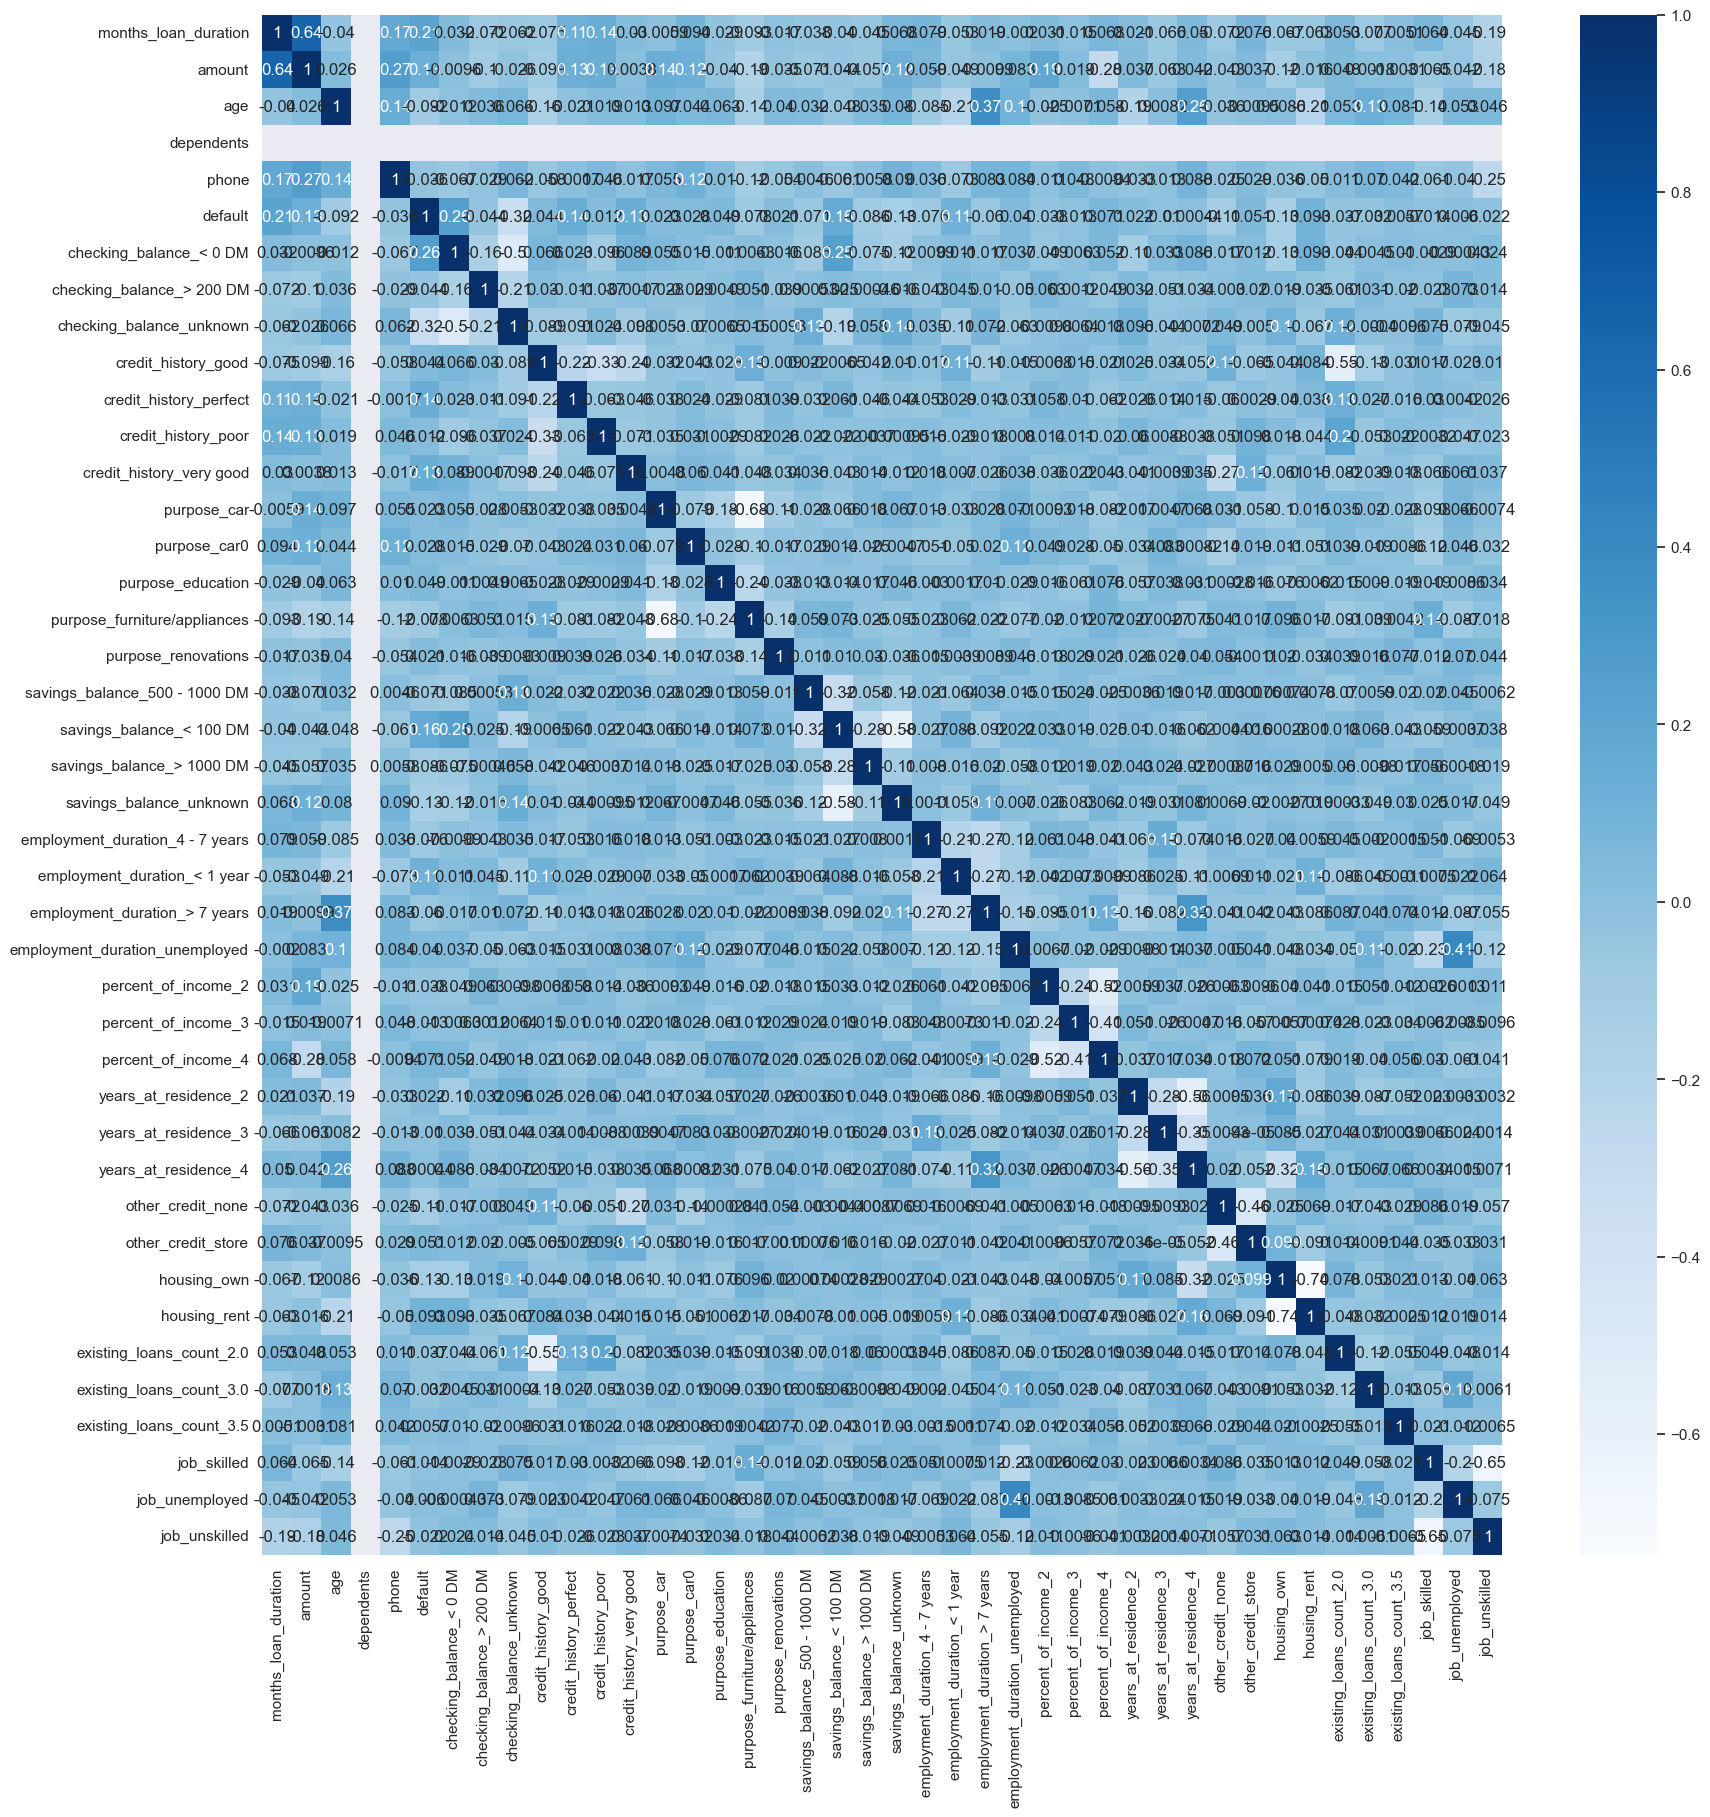

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),annot=True,cmap='Blues')
plt.show()

# Split the data into dependent and independent variable

In [43]:
# split the dataset into dv and idv
x=dataset.drop(['default'],axis=1)
y=dataset['default']

In [44]:
x

,months_loan_duration,amount,age,dependents,phone,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_good,credit_history_perfect,...,other_credit_none,other_credit_store,housing_own,housing_rent,existing_loans_count_2.0,existing_loans_count_3.0,existing_loans_count_3.5,job_skilled,job_unemployed,job_unskilled
0,6.0,1169.0,64.5,0,1,1,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
1,42.0,5951.0,22.0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
2,12.0,2096.0,49.0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
3,42.0,7882.0,45.0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,24.0,4870.0,53.0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.0,1736.0,31.0,0,0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
996,30.0,3857.0,40.0,0,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
997,12.0,804.0,38.0,0,0,0,0,1,1,0,...,1,0,1,0,0,0,0,1,0,0
998,42.0,1845.0,23.0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [45]:
y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: default, Length: 1000, dtype: int8

# Feature Scaling

In [46]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sca=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [47]:
x_sca

,months_loan_duration,amount,age,dependents,phone,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_good,credit_history_perfect,...,other_credit_none,other_credit_store,housing_own,housing_rent,existing_loans_count_2.0,existing_loans_count_3.0,existing_loans_count_3.5,job_skilled,job_unemployed,job_unskilled
0,-1.348465,-0.860961,2.616620,0.0,1.214598,1.627770,-0.259299,-0.806328,-1.061913,-0.204124,...,0.478018,-0.222076,0.634448,-0.466933,1.415275,-0.169725,-0.077693,0.766356,-0.149983,-0.5
1,2.044611,1.326550,-1.211943,0.0,-0.823318,-0.614337,-0.259299,-0.806328,0.941697,-0.204124,...,0.478018,-0.222076,0.634448,-0.466933,-0.706577,-0.169725,-0.077693,0.766356,-0.149983,-0.5
2,-0.782952,-0.436908,1.220321,0.0,-0.823318,-0.614337,-0.259299,1.240190,-1.061913,-0.204124,...,0.478018,-0.222076,0.634448,-0.466933,-0.706577,-0.169725,-0.077693,-1.304877,-0.149983,2.0
3,2.044611,2.209879,0.859985,0.0,-0.823318,1.627770,-0.259299,-0.806328,0.941697,-0.204124,...,0.478018,-0.222076,-1.576173,-0.466933,-0.706577,-0.169725,-0.077693,0.766356,-0.149983,-0.5
4,0.348073,0.832050,1.580656,0.0,-0.823318,1.627770,-0.259299,-0.806328,-1.061913,-0.204124,...,0.478018,-0.222076,-1.576173,-0.466933,1.415275,-0.169725,-0.077693,0.766356,-0.149983,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.782952,-0.601589,-0.401188,0.0,-0.823318,-0.614337,-0.259299,1.240190,0.941697,-0.204124,...,0.478018,-0.222076,0.634448,-0.466933,-0.706577,-0.169725,-0.077693,-1.304877,-0.149983,2.0
996,0.913586,0.368656,0.409566,0.0,1.214598,1.627770,-0.259299,-0.806328,0.941697,-0.204124,...,0.478018,-0.222076,0.634448,-0.466933,-0.706577,-0.169725,-0.077693,-1.304877,-0.149983,-0.5
997,-0.782952,-1.027929,0.229399,0.0,-0.823318,-0.614337,-0.259299,1.240190,0.941697,-0.204124,...,0.478018,-0.222076,0.634448,-0.466933,-0.706577,-0.169725,-0.077693,0.766356,-0.149983,-0.5
998,2.044611,-0.551727,-1.121859,0.0,1.214598,1.627770,-0.259299,-0.806328,0.941697,-0.204124,...,0.478018,-0.222076,-1.576173,-0.466933,-0.706577,-0.169725,-0.077693,0.766356,-0.149983,-0.5


# Imbalance data

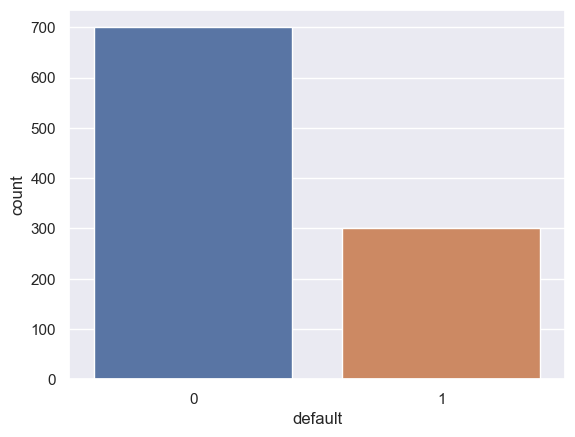

In [48]:
#imbalance checks
sns.countplot(x='default',data=dataset)
plt.show()

In [49]:
# data is imbalance

In [50]:
from imblearn.over_sampling import RandomOverSampler
over=RandomOverSampler()
x_over,y_over=over.fit_resample(x_sca,y)

In [51]:
y_over.value_counts()

0    700
1    700
Name: default, dtype: int64

Text(0.5, 0, 'default')

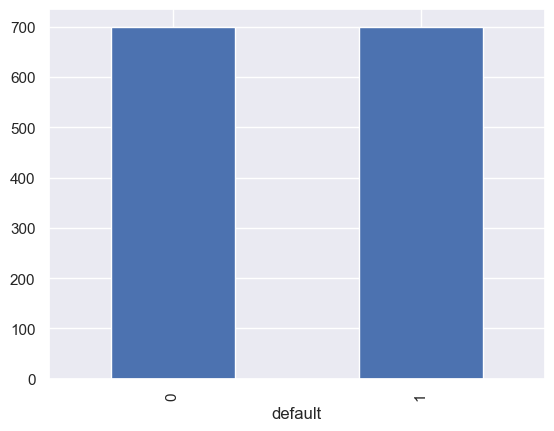

In [52]:
y_over.value_counts().plot(kind='bar')
plt.xlabel('default')

In [53]:
dataset.describe()

,months_loan_duration,amount,age,dependents,phone,default,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_good,...,other_credit_none,other_credit_store,housing_own,housing_rent,existing_loans_count_2.0,existing_loans_count_3.0,existing_loans_count_3.5,job_skilled,job_unemployed,job_unskilled
count,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000
mean,20.307000,3051.101000,35.453500,0.0,0.404000,0.300000,0.274000,0.063000,0.394000,0.530000,...,0.814000,0.047000,0.713000,0.179000,0.333000,0.028000,0.006000,0.630000,0.022000,0.2000
std,10.615151,2187.140403,11.106324,0.0,0.490943,0.458487,0.446232,0.243085,0.488879,0.499349,...,0.389301,0.211745,0.452588,0.383544,0.471522,0.165055,0.077266,0.483046,0.146757,0.4002
min,4.000000,250.000000,19.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,12.000000,1365.500000,27.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,18.000000,2319.500000,33.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0000
75%,24.000000,3972.250000,42.000000,0.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000
max,42.000000,7882.375000,64.500000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000


# Split the data into Train and Test 

In [54]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.25,random_state=101,stratify=y_over)

# Building Logistic Regression

In [55]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [56]:
# Predict
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

In [57]:
y_pred_test

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [58]:
y_test

549     0
1058    1
1066    1
691     0
890     0
       ..
1372    1
1164    1
350     0
958     1
1002    1
Name: default, Length: 350, dtype: int8

In [59]:
# evaluate the model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [60]:
print(confusion_matrix(y_train, y_pred_train))
print("*********"*5)
print(confusion_matrix(y_test, y_pred_test))

[[381 144]
 [125 400]]
*********************************************
[[121  54]
 [ 59 116]]


In [61]:
print(classification_report(y_train, y_pred_train))
print("*********"*5)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       525
           1       0.74      0.76      0.75       525

    accuracy                           0.74      1050
   macro avg       0.74      0.74      0.74      1050
weighted avg       0.74      0.74      0.74      1050

*********************************************
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       175
           1       0.68      0.66      0.67       175

    accuracy                           0.68       350
   macro avg       0.68      0.68      0.68       350
weighted avg       0.68      0.68      0.68       350



In [62]:
Train_Accuracy_Log=(accuracy_score(y_train, y_pred_train))
print(Train_Accuracy_Log)
print("*********"*5)
Test_Accuracy_Log=(accuracy_score(y_test, y_pred_test))
print(Test_Accuracy_Log)

0.7438095238095238
*********************************************
0.6771428571428572


**Cross Validation**

In [63]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit_model, x_train, y_train, cv=10)
test_accuracy = cross_val_score(logit_model, x_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())

Train Accuracy [0.6952381  0.67619048 0.61904762 0.73333333 0.71428571 0.7047619
 0.80952381 0.75238095 0.7047619  0.79047619]

Train Mean Accuracy 0.72

Train Max Accuracy 0.8095238095238095

Test Accuracy [0.71428571 0.6        0.71428571 0.65714286 0.62857143 0.6
 0.65714286 0.54285714 0.8        0.51428571]

Test Mean Accuracy 0.6428571428571429

Test Max Accuracy 0.8


**Roc and AUC**

In [64]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

0.6771428571428573

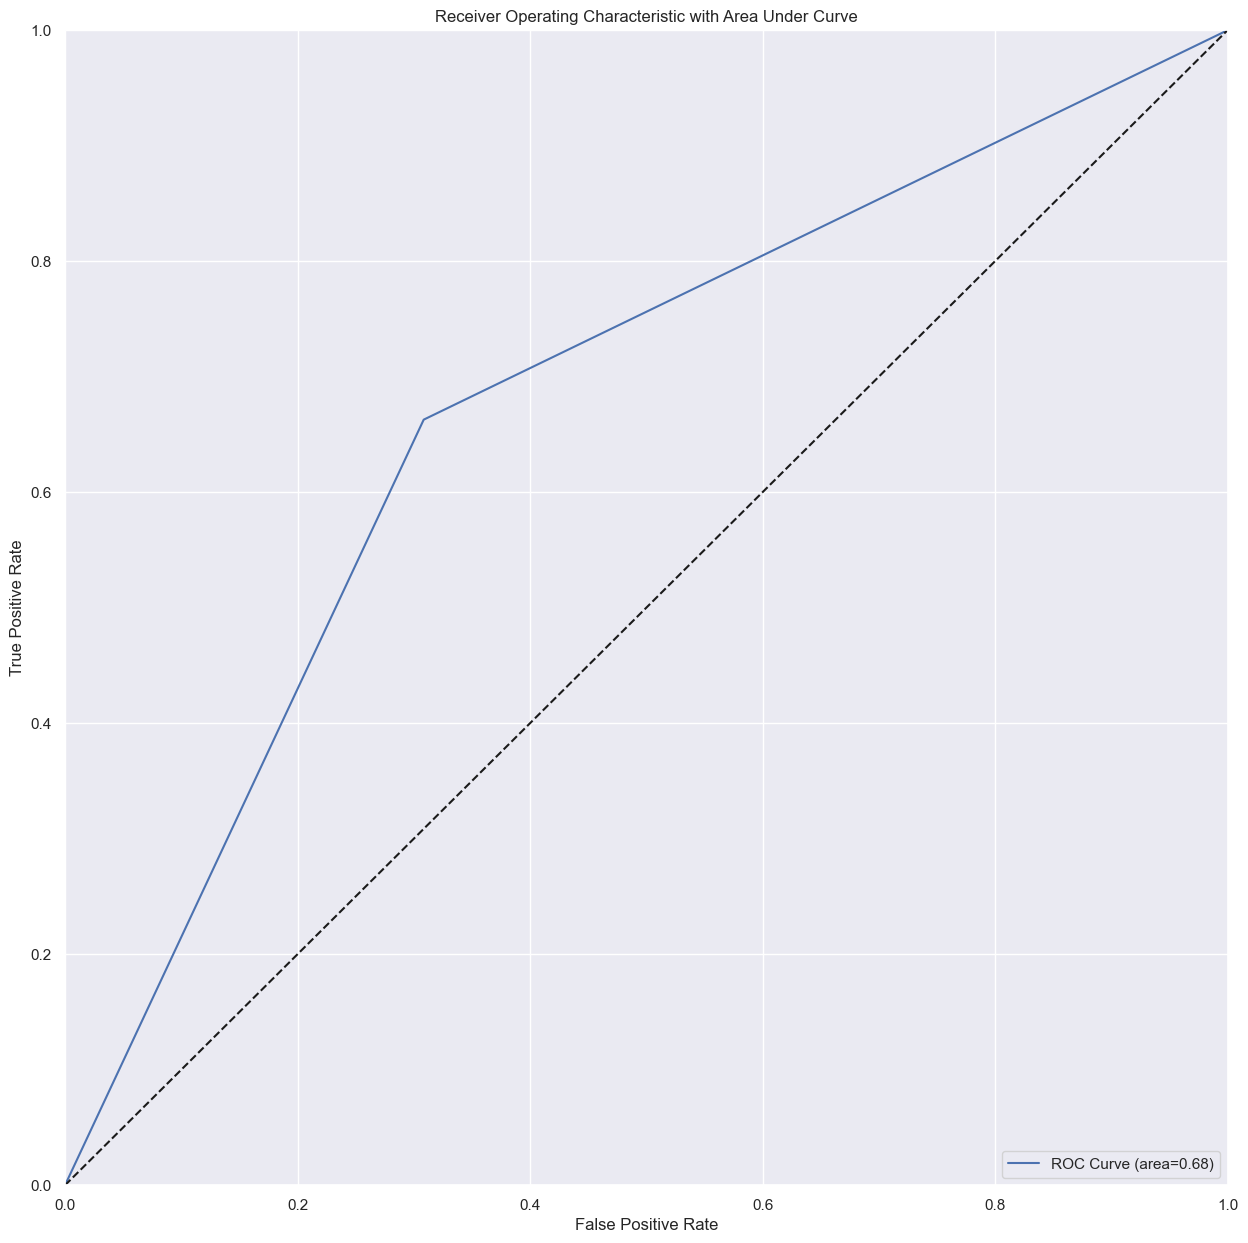

In [65]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(15,15))
plt.plot(fpr, tpr, label="ROC Curve (area=%0.2f)" %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

# # Building Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dtree=DecisionTreeClassifier(criterion='gini',max_depth=3)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [68]:
# Predict
y_pred_dt_train=dtree.predict(x_train)
y_pred_dt_test=dtree.predict(x_test)

In [69]:
# Evaluation matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [70]:
print(confusion_matrix(y_train,y_pred_dt_train))
print()
print(confusion_matrix(y_test,y_pred_dt_test))

[[305 220]
 [ 77 448]]

[[103  72]
 [ 35 140]]


In [71]:
print(classification_report(y_train,y_pred_dt_train))
print()
print(classification_report(y_test,y_pred_dt_test))

              precision    recall  f1-score   support

           0       0.80      0.58      0.67       525
           1       0.67      0.85      0.75       525

    accuracy                           0.72      1050
   macro avg       0.73      0.72      0.71      1050
weighted avg       0.73      0.72      0.71      1050


              precision    recall  f1-score   support

           0       0.75      0.59      0.66       175
           1       0.66      0.80      0.72       175

    accuracy                           0.69       350
   macro avg       0.70      0.69      0.69       350
weighted avg       0.70      0.69      0.69       350



In [72]:
from sklearn.metrics import accuracy_score

In [73]:
Train_Accuracy_Dtree=(accuracy_score(y_train,y_pred_dt_train))
print(Train_Accuracy_Dtree)
print("**********************"*5)
Test_Accuracy_Dtree=(accuracy_score(y_test,y_pred_dt_test))
print(Test_Accuracy_Dtree)

0.7171428571428572
**************************************************************************************************************
0.6942857142857143


# Building Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rforest = RandomForestClassifier()
rforest = RandomForestClassifier(n_estimators=500, criterion='entropy',max_depth=2, max_features=2, oob_score=True)
rforest.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=2, max_features=2,
                       n_estimators=500, oob_score=True)

In [76]:
y_pred_rf_train = rforest.predict(x_train)
y_pred_rf_test = rforest.predict(x_test)

In [77]:
rforest.feature_importances_

array([0.08279882, 0.06697816, 0.06263826, 0.        , 0.01273466,
       0.0778698 , 0.01277327, 0.09322672, 0.00979143, 0.05243158,
       0.00400286, 0.03976975, 0.01142915, 0.00462879, 0.0094781 ,
       0.03307221, 0.01020532, 0.02340097, 0.04789643, 0.02706339,
       0.04065125, 0.01631359, 0.01964702, 0.01956127, 0.01118463,
       0.00586017, 0.00402603, 0.01178253, 0.00574922, 0.00472676,
       0.00463224, 0.02894159, 0.01240682, 0.05272306, 0.03383422,
       0.01392032, 0.0109897 , 0.00368671, 0.00636519, 0.00573535,
       0.00507265])

In [78]:
Train_Accuracy_rf=(accuracy_score(y_train, y_pred_rf_train))
print(Train_Accuracy_rf)
print("*******************"*5)
Test_Accuracy_rf=(accuracy_score(y_test, y_pred_rf_test))
print(Test_Accuracy_rf)

0.7457142857142857
***********************************************************************************************
0.6857142857142857


In [79]:
rf=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_rf_test})
rf.reset_index(drop=True,inplace=True)
rf

,Actual,Predicted
0,0,0
1,1,1
2,1,0
3,0,0
4,0,1
...,...,...
345,1,1
346,1,0
347,0,0
348,1,1


# Naive Bayes Theorem

**Gaussian Naive Bayes**

In [80]:
from sklearn.naive_bayes import GaussianNB

In [81]:
# GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [82]:
y_pred_gnb_train = gnb.predict(x_train)
y_pred_gnb_test = gnb.predict(x_test)

In [83]:
y_pred_gnb_test

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [84]:
# Evaluation matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [85]:
print(confusion_matrix(y_train, y_pred_gnb_train))
print()
print(confusion_matrix(y_test, y_pred_gnb_test))

[[401 124]
 [199 326]]

[[135  40]
 [ 76  99]]


In [86]:
print(classification_report(y_train, y_pred_gnb_train))
print()
print(classification_report(y_test, y_pred_gnb_test))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       525
           1       0.72      0.62      0.67       525

    accuracy                           0.69      1050
   macro avg       0.70      0.69      0.69      1050
weighted avg       0.70      0.69      0.69      1050


              precision    recall  f1-score   support

           0       0.64      0.77      0.70       175
           1       0.71      0.57      0.63       175

    accuracy                           0.67       350
   macro avg       0.68      0.67      0.67       350
weighted avg       0.68      0.67      0.67       350



In [87]:
Train_accuracy_gnb=(accuracy_score(y_train, y_pred_gnb_train))
print(Train_accuracy_gnb)
print("****************"*5)
Test_Accuracy_gnb=(accuracy_score(y_test, y_pred_gnb_test))
print(Test_Accuracy_gnb)

0.6923809523809524
********************************************************************************
0.6685714285714286


**Bernoulli Naive Bayes**

In [88]:
from sklearn.naive_bayes import BernoulliNB

In [89]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [90]:
y_pred_bnb_train = bnb.predict(x_train)
y_pred_bnb_test = bnb.predict(x_test)

In [91]:
print(confusion_matrix(y_train, y_pred_bnb_train))
print()
print(confusion_matrix(y_test, y_pred_bnb_test))

[[374 151]
 [145 380]]

[[123  52]
 [ 67 108]]


In [92]:
print(classification_report(y_train, y_pred_bnb_train))
print()
print(classification_report(y_test, y_pred_bnb_test))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72       525
           1       0.72      0.72      0.72       525

    accuracy                           0.72      1050
   macro avg       0.72      0.72      0.72      1050
weighted avg       0.72      0.72      0.72      1050


              precision    recall  f1-score   support

           0       0.65      0.70      0.67       175
           1       0.68      0.62      0.64       175

    accuracy                           0.66       350
   macro avg       0.66      0.66      0.66       350
weighted avg       0.66      0.66      0.66       350



In [93]:
train_Accuracy_bnb=(accuracy_score(y_train, y_pred_bnb_train))
print(train_Accuracy_bnb)
print("***************"*5)
test_accuracy_bnb=(accuracy_score(y_test, y_pred_bnb_test))
print(test_accuracy_bnb)

0.7180952380952381
***************************************************************************
0.66


# Support Vector Machine


In [94]:
from sklearn.svm import SVC

In [95]:
# kernel = 'linear'
svm_linear = SVC(C=0.5,kernel='linear')
svm_linear.fit(x_train, y_train)

SVC(C=0.5, kernel='linear')

In [96]:
y_pred_train_linear = svm_linear.predict(x_train)
y_pred_test_linear = svm_linear.predict(x_test)

In [97]:
train_accuracy_svm= (accuracy_score(y_train, y_pred_train_linear))
print(train_accuracy_svm)
print("*****************"*10)
test_accuracy_svm=(accuracy_score(y_test, y_pred_test_linear))
print(test_accuracy_svm)

0.7476190476190476
**************************************************************************************************************************************************************************
0.6885714285714286


# Conclusion

In [98]:
model=['Logistic Regression','Decision Tree','Random Forest','Gaussian Naive Bayes','Bernoulli Naive Bayes','Support vector machine(kernal=linear)']
train_Accuracy=[Train_Accuracy_Log,Train_Accuracy_Dtree,Train_Accuracy_rf,Train_accuracy_gnb,train_Accuracy_bnb,train_accuracy_svm]
test_accuracy=[Test_Accuracy_Log,Test_Accuracy_Dtree,Test_Accuracy_rf,Test_Accuracy_gnb,test_accuracy_bnb,test_accuracy_svm]
final_accuracy=pd.DataFrame({"Model used":model,"Train Accuracy":train_Accuracy,"Test Accuracy":test_accuracy})
print(final_accuracy)

                              Model used  Train Accuracy  Test Accuracy
0                    Logistic Regression        0.743810       0.677143
1                          Decision Tree        0.717143       0.694286
2                          Random Forest        0.745714       0.685714
3                   Gaussian Naive Bayes        0.692381       0.668571
4                  Bernoulli Naive Bayes        0.718095       0.660000
5  Support vector machine(kernal=linear)        0.747619       0.688571


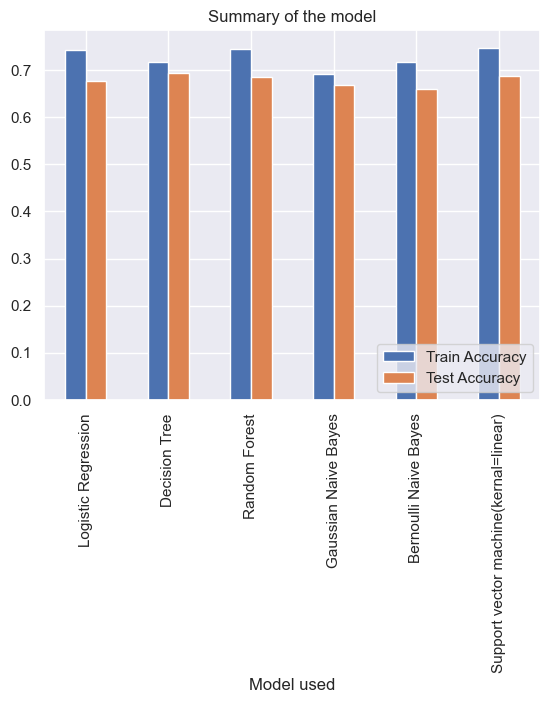

In [99]:
final_accuracy.plot(kind='bar',x='Model used')
plt.title('Summary of the model')
plt.legend(loc='lower right')
plt.show()